In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import inverseKin, inverseDyn, minimumJerk, generateMotorCommands

In [2]:
# Load the data from dataset_spikes.gdf
import re

def parse_line(line, structure):
    # Extract the different categories using regular expressions
    categories = re.findall(r'\[\[.*?\]\]|\[.*?\]', line)
    
    parsed_data = {}
    for i, category in enumerate(categories):
        # Extract the numerical values within each category
        values = re.findall(r'[\d.]+', category)
        # Convert the extracted values to float or int
        parsed_values = [float(value) if '.' in value else int(value) for value in values]
        parsed_data[structure[i]] = parsed_values
    
    return parsed_data

def parse_file(filename, structure):
    parsed_lines = []
    with open(filename, 'r') as file:
        for line in file:
            parsed_line = parse_line(line.strip(), structure)
            parsed_lines.append(parsed_line)
    return parsed_lines

# Define the structure
structure = ['initial_pos', 'target_pos', 'senders_pos', 'times_pos', 'senders_neg', 'times_neg']

# Parse the file
parsed_data = parse_file('dataset_spikes.gdf', structure)

In [3]:
# Parse the data
initial_pos = [data['initial_pos'] for data in parsed_data]
target_pos = [data['target_pos'] for data in parsed_data]
senders_pos = [data['senders_pos'] for data in parsed_data]
times_pos = [data['times_pos'] for data in parsed_data]
senders_neg = [data['senders_neg'] for data in parsed_data]
times_neg = [data['times_neg'] for data in parsed_data]

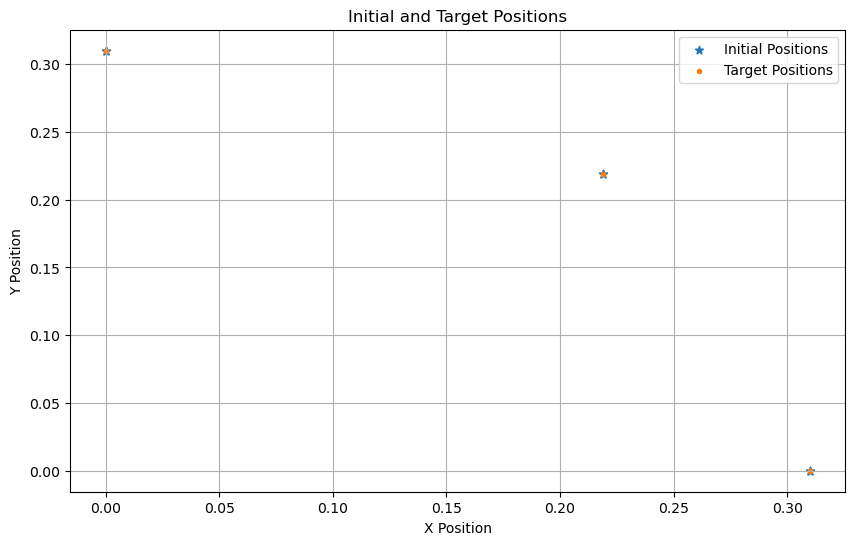

In [4]:
# Extract initial and target positions
initial_x = [pos[0] for pos in initial_pos]
initial_y = [pos[1] for pos in initial_pos]
target_x = [pos[0] for pos in target_pos]
target_y = [pos[1] for pos in target_pos]

# Plot the positions
plt.figure(figsize=(10, 6))
plt.scatter(initial_x[0:-1:10], initial_y[0:-1:10], marker='*', label='Initial Positions')
plt.scatter(target_x[0:-1:10], target_y[0:-1:10], marker='.', label='Target Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Initial and Target Positions')
plt.legend()
plt.grid(True)

In [5]:
# Convert lists to numpy arrays
initial_pos_np = np.array(initial_pos)
target_pos_np = np.array(target_pos)

# Test inverseKin function
theta = inverseKin(initial_pos_np)
print("Inverse Kinematics (theta):", theta)

Inverse Kinematics (theta): [[1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
  1.57079633 1.57079633 1.57079633 1.57079633 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
  0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
  0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
  0.78539816 0.78539816 1.57079633 1.57079633 1.57079633 1.57079633
  1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633]]


In [6]:
# Test minimumJerk function
timespan = np.linspace(0, 0.65, 100)  # Example timespan
pp, pol = minimumJerk(initial_pos_np[0], target_pos_np[0], timespan)
print("Minimum Jerk Trajectory (pp):", pp)

Minimum Jerk Trajectory (pp): [[0.00000000e+00 3.10000000e-01]
 [3.14667961e-06 3.09996853e-01]
 [2.47908714e-05 3.09975209e-01]
 [8.23885939e-05 3.09917611e-01]
 [1.92281028e-04 3.09807719e-01]
 [3.69717985e-04 3.09630282e-01]
 [6.28881381e-04 3.09371119e-01]
 [9.82908704e-04 3.09017091e-01]
 [1.44391648e-03 3.08556084e-01]
 [2.02302376e-03 3.07976976e-01]
 [2.73037557e-03 3.07269624e-01]
 [3.57516639e-03 3.06424834e-01]
 [4.56566362e-03 3.05434336e-01]
 [5.70923106e-03 3.04290769e-01]
 [7.01235238e-03 3.02987648e-01]
 [8.48065458e-03 3.01519345e-01]
 [1.01189315e-02 2.99881069e-01]
 [1.19311671e-02 2.98068833e-01]
 [1.39205593e-02 2.96079441e-01]
 [1.60895432e-02 2.93910457e-01]
 [1.84398144e-02 2.91560186e-01]
 [2.09723528e-02 2.89027647e-01]
 [2.36874460e-02 2.86312554e-01]
 [2.65847126e-02 2.83415287e-01]
 [2.96631257e-02 2.80336874e-01]
 [3.29210365e-02 2.77078964e-01]
 [3.63561978e-02 2.73643802e-01]
 [3.99657872e-02 2.70034213e-01]
 [4.37464310e-02 2.66253569e-01]
 [4.76942272e

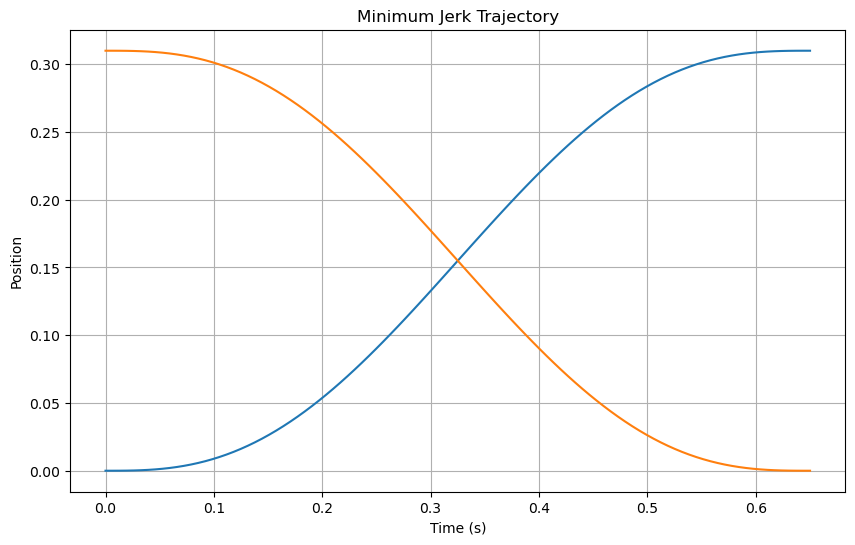

In [7]:
# Plot the minimum jerk trajectory
plt.figure(figsize=(10, 6))
plt.plot(timespan, pp)
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Minimum Jerk Trajectory')
plt.grid(True)
plt.show()

In [8]:
# Test generateMotorCommands function
motor_commands = generateMotorCommands(initial_pos_np[0], target_pos_np[0], timespan)
print("Motor Commands:", motor_commands)

ValueError: operands could not be broadcast together with shapes (1,2) (100,) 